In [9]:
import psycopg2
from psycopg2.extras import RealDictCursor
import pandas as pd
import panel as pn
import hvplot.pandas
import param
from panel import Spacer
import yaml
import sqlite3
pn.extension('tabulator')
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [10]:
def calculate_compound_interest(P, r, n, t):
    return P * (1 + r/n) ** (n*t)

def fetch_data(query, db_path='db/database.db'):
    """
    Fetch data from the SQLite database and return it as a pandas DataFrame.

    :param query: SQL query to execute.
    :param db_path: Path to the SQLite database file. Default is 'database.db'.
    :return: pandas DataFrame containing the query results.
    """
    # Connect to the SQLite database
    conn = sqlite3.connect(db_path)
    
    # Use pandas to execute the query and fetch the data
    df = pd.read_sql_query(query, conn)
    
    # Close the connection
    conn.close()
    
    return df

In [17]:
df_transactions = fetch_data("SELECT * FROM transactions")
df_imports = fetch_data("SELECT * FROM imports")
df_accumulations = fetch_data("SELECT * FROM budget_accumulations")
df_transactions = df_transactions.sort_values(by='tag')
df_transactions['date'] = pd.to_datetime(df_transactions['date'], format='%Y-%m-%d', errors='coerce')
df_imports['date'] = pd.to_datetime(df_imports['date'], format='%Y-%m-%d', errors='coerce')
df_accumulations['date'] = pd.to_datetime(df_accumulations['date'], format='%Y-%m-%d', errors='coerce')

with open('budgets.yaml', 'r') as file:
    yaml_data = yaml.safe_load(file)

budget_df = pd.DataFrame(yaml_data['budgets'])
total_budget_per_month = budget_df['amount'].sum()
total_expenses_per_month = budget_df[ budget_df['category'] == 'Expense' ]['amount'].sum()
total_investments_per_month = budget_df[ budget_df['category'] != 'Expense' ]['amount'].sum()
budget_df.columns = ['tag','category','budget']
df_transactions

,date,description,amount,tag,card
295,2024-05-18,RETIRO-SIN-TARJETA-QR-/-******3647-,400.00,Cash,bbva_debit
292,2024-05-28,RETIRO-SIN-TARJETA-QR-/-******3647-,100.00,Cash,bbva_debit
301,2024-04-17,RETIRO-SIN-TARJETA-/-******3647-,500.00,Cash,bbva_debit
288,2024-03-09,RETIRO-SIN-TARJETA-QR-/-******3647-,1000.00,Cash,bbva_debit
294,2024-05-20,RETIRO-SIN-TARJETA-QR-/-******3647-,500.00,Cash,bbva_debit
19,2024-05-06,PAYPAL-*GOOGLE-YOUTUBE-4029357733,139.00,Entertainment,amex
86,2024-03-15,PAYPAL-*CRUNCHYROLL-4157963560,119.00,Entertainment,amex
78,2024-03-24,PAYPAL-*SPOTIFY-02031025243,169.00,Entertainment,amex
47,2024-04-16,PAYPAL-*CRUNCHYROLL-4157963560,119.00,Entertainment,amex
205,2024-02-25,CINEPOLIS DULCERIA,239.00,Entertainment,bbva_credit


In [12]:
start_date = pd.Timestamp('2024-01-01')
tags = list(budget_df['tag'])
sort_direction = ['Ascending', 'Descending']
drop_columns = ['slider_value']

def date_to_slider_value(date):
    if pd.isna(date):
        return None
    return (date.year - start_date.year) * 12 + (date.month - start_date.month) + 1


df_transactions['slider_value'] = df_transactions['date'].apply(date_to_slider_value)
df_imports['slider_value'] = df_imports['date'].apply(date_to_slider_value)
df_accumulations['slider_value'] = df_accumulations['date'].apply(date_to_slider_value)

month_slider = pn.widgets.IntSlider(name='Month Slider', start=1, end=12, step=1, value=1)
sort_columns = list(df_transactions.columns)

df_transactions = pd.merge(df_transactions, budget_df, on='tag', how='left')
df_transactions.drop(columns=['budget'], inplace=True)
tags

['Food',
 'Gas',
 'Shopping',
 'Other',
 'Home',
 'Self-care',
 'Gym',
 'Productivity',
 'Services',
 'Rent',
 'Cetes',
 'Entertaiment',
 'Vacations',
 'Cash',
 'Investments']

In [13]:
### Widgets
tag_check_box = pn.widgets.CheckBoxGroup(name='Tags', options=tags, value=tags)

class FilterParams(param.Parameterized):
    month = param.Integer(default=1, bounds=(1, 12))
    tags = param.ListSelector(default=tags)
    sort_column = param.ObjectSelector(default='date', objects=sort_columns)
    sort_order = param.Selector(default='Ascending', objects=sort_direction)

filter_params = FilterParams()

month_slider.link(filter_params, value='month')
tag_check_box.link(filter_params, value='tags')

sort_column_selector = pn.widgets.Select(name='Sort Column', options=sort_columns, value='date')
sort_order_selector = pn.widgets.RadioBoxGroup(name='Sort Order', options=sort_direction, inline=True)

sort_column_selector.link(filter_params, value='sort_column')
sort_order_selector.link(filter_params, value='sort_order')

Watcher(inst=RadioBoxGroup(inline=True, name='Sort Order', options=['Ascending', ...], value='Ascending'), cls=<class 'panel.widgets.select.RadioBoxGroup'>, fn=<function Reactive.link.<locals>.link_cb at 0x7248b02fe8e0>, mode='args', onlychanged=True, parameter_names=('value',), what='value', queued=False, precedence=0)

In [14]:
PAGE_SIZE = 35

@pn.depends(filter_params.param.month, filter_params.param.tags)
def update_tag_pipeline(month, tags):
    filtered_data = df_transactions[(df_transactions['slider_value'] == month) & (df_transactions['tag'].isin(tags))]
    filtered_data = filtered_data.drop(columns=drop_columns, axis=1, errors='ignore')
    return pn.pane.DataFrame(filtered_data.groupby('tag')['amount'].sum().reset_index(), sizing_mode='stretch_width', index=False)


@pn.depends(filter_params.param.month, filter_params.param.tags, filter_params.param.sort_column, filter_params.param.sort_order)
def update_pipeline(month, tags, sort_column, sort_order):
    filtered_data = df_transactions[(df_transactions['slider_value'] == month) & (df_transactions['tag'].isin(tags))]
    filtered_data = filtered_data.drop(columns=drop_columns, axis=1, errors='ignore')
    filtered_data = filtered_data.sort_values(by=sort_column, ascending=(sort_order == 'Ascending'))
    filtered_data['date'] = filtered_data['date'].dt.strftime('%Y-%m-%d')

    column_widths = {
        'date': 100,
        'description': 250,
        'amount': 100,
        'tag': 100,
        'card': 100,
        'category': 200
    }
    
    return pn.widgets.Tabulator(filtered_data, pagination='local', page_size=PAGE_SIZE, sizing_mode='stretch_width', show_index=False, widths=column_widths)


@pn.depends(filter_params.param.month)
def update_imports(month):
    filtered_data = df_imports[df_imports['slider_value'] == month]
    filtered_data = filtered_data.drop(columns=drop_columns, axis=1, errors='ignore')
    return pn.pane.DataFrame(filtered_data, sizing_mode='stretch_width', index=False)


@pn.depends(filter_params.param.month)
def update_accumulations(month):
    filtered_data = df_accumulations[df_accumulations['slider_value'] == month]
    filtered_data = filtered_data.drop(columns=drop_columns, axis=1, errors='ignore')
    return pn.pane.DataFrame(filtered_data, sizing_mode='stretch_width', index=False)

@pn.depends(filter_params.param.month, filter_params.param.tags)
def total_amount_display(month, tags):
    filtered_data = df_transactions[(df_transactions['slider_value'] == month) & (df_transactions['tag'].isin(tags))]
    total_expense = filtered_data[ filtered_data['category'] != 'Ivestment' ]['amount'].sum()
    total_invested = filtered_data[ filtered_data['category'] == 'Ivestment' ]['amount'].sum()
    total = filtered_data['amount'].sum()
    
    diff = total_expense - total_expenses_per_month
    overspent = diff if total_expense > total_expenses_per_month else 0

    income = df_imports[df_imports['slider_value'] == month]['amount'].sum()
    saved = income - total_expense + total_invested

    total = f"Total: ${total:,.2f}"
    total_spent = f"Total Spent: ${total_expense:,.2f}"
    total_invested = f"Total Invested: ${total_invested:,.2f}"
    
    budget_overspent = f"Budget Overspent: ${overspent:,.2f}"
    total_income = f"Total Income: ${income:,.2f}"
    remaining_text = f"Saved or Invested: ${saved:,.2f}"
    compounded = calculate_compound_interest(saved, .1, 1, 5)
    compounded_text = f"Compounded for 5 years at 10% rate: ${compounded:,.2f}"

    expenses = f"{total}\n{total_spent}\n{budget_overspent}"
    incomes_invs = f"{total_income}\n{total_invested}\n{remaining_text}\n{compounded_text}"
    
    return f"{expenses}\n\n{incomes_invs}"

@pn.depends(filter_params.param.month, filter_params.param.tags)
def update_budget_usage(month, tags):
    filtered_data = df_transactions[(df_transactions['slider_value'] == month) & (df_transactions['tag'].isin(tags))]
    spending_summary = filtered_data.groupby('tag')['amount'].sum().reset_index()

    merged_data = pd.merge(spending_summary, budget_df, on='tag', how='left')
    merged_data['percentage_used'] = (merged_data['amount'] / merged_data['budget']) * 100

    bar_plot = merged_data.hvplot.bar(
        x='tag',
        y='percentage_used',
        ylim=(0, 200),
        height=400,
        width=700,
        xlabel='Tag',
        ylabel='Percentage of Budget Used (%)',
        title='Budget Usage by Tag'
    )
    return bar_plot

FastListTemplate
    [js_area] HTML(None, height=0, margin=0, sizing_mode='fixed', width=0)
    [actions] TemplateActions()
    [browser_info] BrowserInfo()
    [busy_indicator] LoadingSpinner(height=20, width=20)
    [main-125656518731216] GridSpec(ncols=4, nrows=2, sizing_mode='stretch_both')
        [0] Column(sizing_mode='stretch_both')
            [0] Markdown(str)
            [1] ParamFunction(function, _pane=Tabulator, defer_load=False)
        [1] Column(sizing_mode='stretch_both', styles={'text-align': 'center', ...})
            [0] Markdown(str)
            [1] ParamFunction(function, _pane=DataFrame, defer_load=False)
        [2] Column(sizing_mode='stretch_both', styles={'text-align': 'center', ...})
            [0] Markdown(str)
            [1] DataFrame(DataFrame, sizing_mode='stretch_width')
            [2] Markdown(str)
        [3] Markdown(str, sizing_mode='stretch_both', styles={'text-align': 'center', ...})
        [4] Column(sizing_mode='stretch_both', styles={'text-align': 'center', ...})
            [0] Markdown(str)
            [1] ParamFunction(function, _pane=HoloViews, defer_load=False)
        [5] Column(sizing_mode='stretch_both', styles={'text-align': 'center', ...})
            [0] Markdown(str)
            [1] ParamFunction(function, _pane=DataFrame, defer_load=False)
        [6] Column(sizing_mode='stretch_both', styles={'text-align': 'center', ...})
            [0] Markdown(str)
            [1] ParamFunction(function, _pane=DataFrame, defer_load=False)
    [nav-125657404524880] Markdown(str)
    [nav-125656481814288] Markdown(str)
    [nav-125656481824528] PNG(str, width=300)
    [nav-125656481824592] Markdown(str)
    [nav-125656481893456] Markdown(str)
    [nav-125656519207440] IntSlider(end=12, name='Month Slider', start=1, value=1)
    [nav-125656481903696] Spacer(height=20)
    [nav-125656481902864] Markdown(str)
    [nav-125657445314064] CheckBoxGroup(name='Tags', options=['Food', 'Gas', ...], value=['Food', 'Gas', ...])
    [nav-125656481918352] Spacer(height=20)
    [nav-125656481918416] Markdown(str)
    [nav-125656519398864] Select(name='Sort Column', options=['date', 'description', ...], value='date')
    [nav-125656519398160] RadioBoxGroup(inline=True, name='Sort Order', options=['Ascending', ...], value='Ascending')
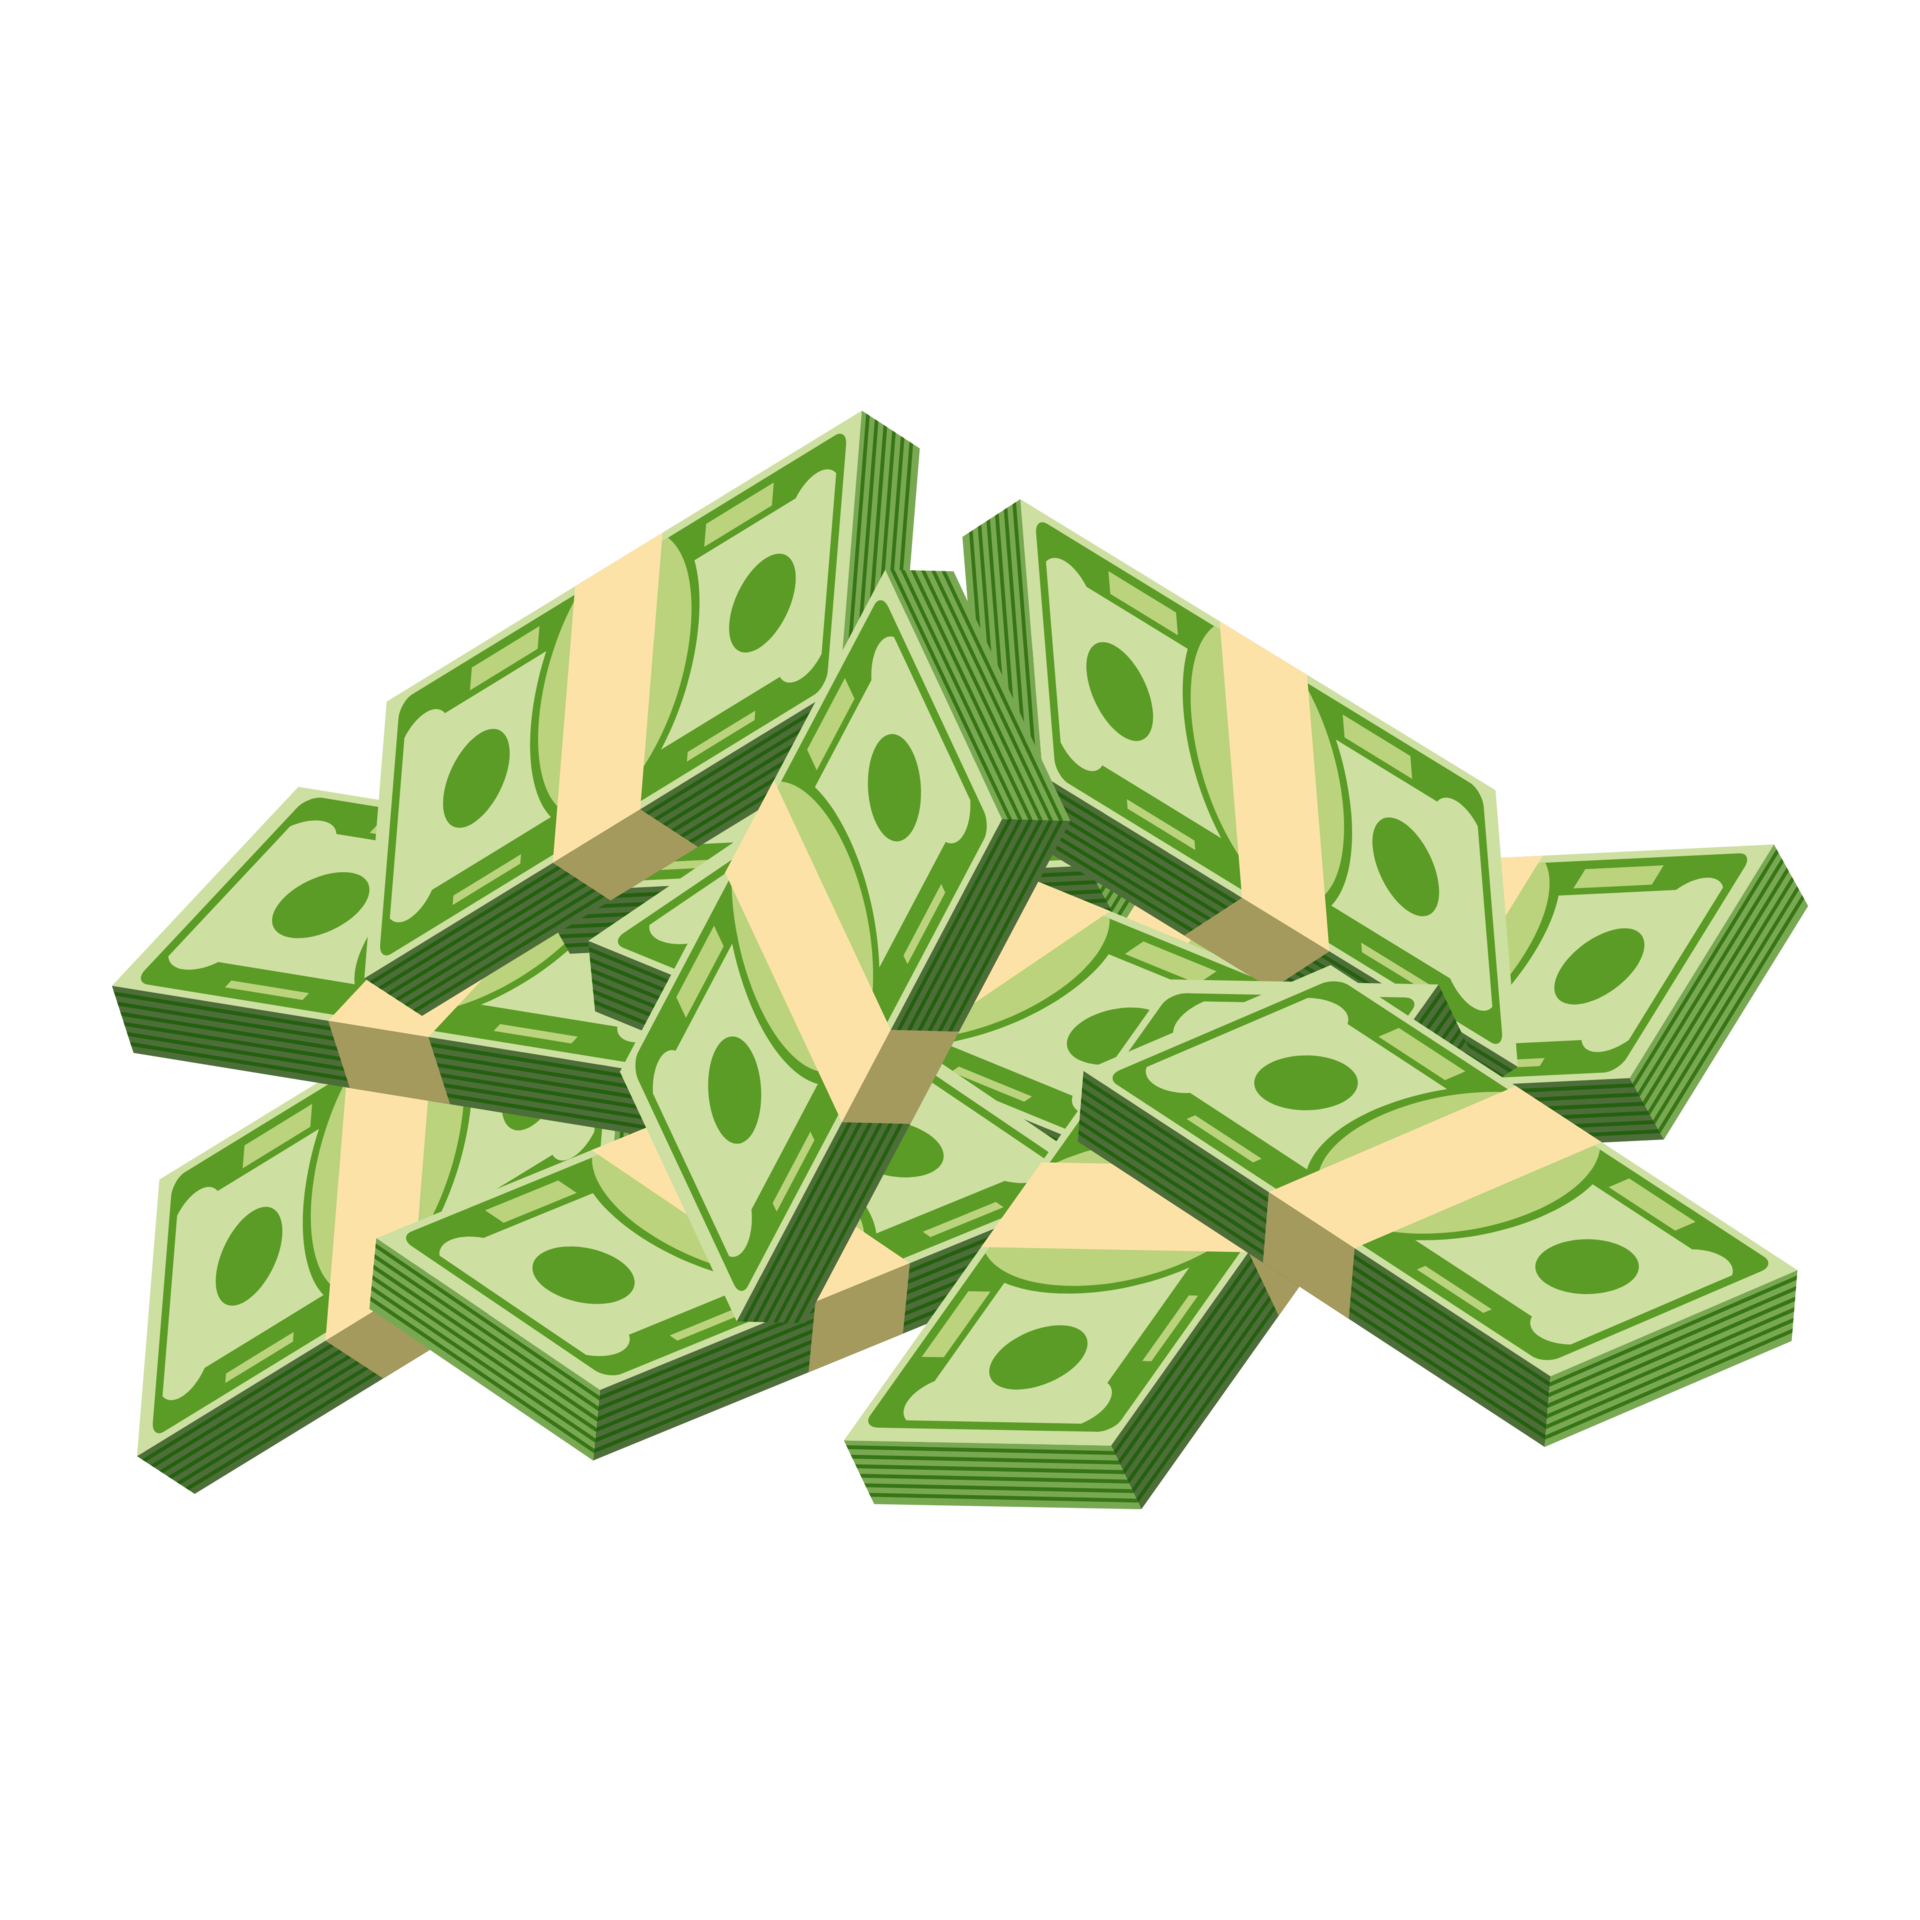

In [15]:
custom_style_total = {'text-align': 'center', 'font-size': '30px'}
custom_style_tables = {'text-align': 'center', 'border': '1px solid black', 'box-shadow': '5px 5px 5px #bcbcbc', 'padding': '10px'}

total_amount_markdown = pn.pane.Markdown(total_amount_display, sizing_mode='stretch_width', styles=custom_style_total)

title_data_p = pn.pane.Markdown("## Monthly Transaction Summary")
title_tag_pipeline = pn.pane.Markdown("## Transactions Grouped by Tag")
budget = f"### Budget: ${total_budget_per_month:,.2f}"
budget_expenses = f"Expenses: ${total_expenses_per_month:,.2f}"
budget_inv = f"Investments: ${total_investments_per_month:,.2f}"
budget_detail = pn.pane.Markdown(f"{budget}    {budget_expenses}    {budget_inv}\n")
budget_title = pn.pane.Markdown(f"## Budget")

image_path = "/home/emanjarrez/code/python/budgets-visualization/img/image.png"

layout_desktop = pn.GridSpec(sizing_mode='stretch_both')
layout_desktop[0:2, 0] = pn.Column(title_data_p, update_pipeline)
layout_desktop[0, 1] = pn.Column(title_tag_pipeline, update_tag_pipeline, styles=custom_style_tables)
layout_desktop[0, 2] = pn.Column(budget_title, pn.pane.DataFrame(budget_df, sizing_mode='stretch_width'), budget_detail, styles=custom_style_tables)
layout_desktop[1, 3] = total_amount_markdown
layout_desktop[1, 1] = pn.Column("## Budget Usage Visualization", update_budget_usage, styles=custom_style_tables)
layout_desktop[0, 3] = pn.Column("## Income", update_imports, styles=custom_style_tables)
layout_desktop[1, 2] = pn.Column("## Budget Accumulations", update_accumulations, styles=custom_style_tables)

layout_mobile = pn.Column(
    pn.GridSpec(sizing_mode='stretch_both'),
    pn.Column(title_data_p, update_pipeline),
    pn.Column(title_tag_pipeline, update_tag_pipeline, styles=custom_style_tables),
    pn.Column(budget_title, pn.pane.DataFrame(budget_df, sizing_mode='stretch_width'), budget_detail, styles=custom_style_tables),
    pn.Column("## Income", update_imports, styles=custom_style_tables),
    pn.Column("## Budget Accumulations", update_accumulations, styles=custom_style_tables),
    pn.Column("## Budget Usage Visualization", update_budget_usage, styles=custom_style_tables),
    total_amount_markdown
)

template = pn.template.FastListTemplate(
    title='Spending Dashboard',
    sidebar=[
        pn.pane.Markdown("# Transactions of 2024"),
        pn.pane.Markdown("### “You’ve learned the lessons well. You first learned to live on less than you earn. Next you learned to seek advice from those who are competent. Lastly, you’ve learned to make gold work for you.”"),
        pn.pane.PNG(image_path, width=300),
        pn.pane.Markdown("## Settings"),
        pn.pane.Markdown("### Filter by Month"),
        month_slider,
        pn.Spacer(height=20),
        pn.pane.Markdown("### Filer by Tags"),
        tag_check_box,
        pn.Spacer(height=20),
        pn.pane.Markdown("### Sort by"),
        sort_column_selector,
        sort_order_selector
    ],
    main=[layout_desktop],
    theme='dark'
)

template.servable()
# panel serve Visualize.py